In [1]:
%%html
<img src="https://www.edmtunes.com/wp-content/uploads/2018/04/spotify-logo-computer-wallpaper-62369-64312-hd-wallpapers.jpg" width="600"/>

# Spotify's Worldwide Daily Song Ranking
### The 200 daily most streamed songs in 53 countries
dataset can be found here:
    https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking



In [2]:
# Load libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Read data
raw = pd.read_csv("../Downloads/spotify.csv.zip", encoding='utf8')
# Create a copy of the raw data
df = raw.copy()

In [4]:
print(format(df.shape[0], ','), "Rows by", df.shape[1], "columns")
print('\n', 100*'*')
display(df.head())
display(df.tail())
print('\n', 100*'*')
display(df.info())
print('\n', 100*'*')

# format Sci-Notation to "1E4" to "1,000" for display 
pd.options.display.float_format = '{:,.0f}'.format

# Get summary statistics
display(df['Streams'].describe())


3,441,197 Rows by 7 columns

 ****************************************************************************************************


,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


,Position,Track Name,Artist,Streams,URL,Date,Region
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk
3441196,200,Let Her Go,Passenger,2088,https://open.spotify.com/track/2jyjhRf6DVbMPU5...,2018-01-09,hk



 ****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
Position      int64
Track Name    object
Artist        object
Streams       int64
URL           object
Date          object
Region        object
dtypes: int64(2), object(5)
memory usage: 183.8+ MB


None


 ****************************************************************************************************


count    3,441,197
mean        51,892
std        201,804
min          1,001
25%          3,322
50%          9,227
75%         29,658
max     11,381,520
Name: Streams, dtype: float64

### Each row represents a Position ```(1-200)```, Track Name, Artist, Stream Count, URL, Date, and Region

In [5]:
df['Track Name'].isna().value_counts()/df.shape[0] * 100

False   100
True      0
Name: Track Name, dtype: float64

In [6]:
df[df.Date < '2018']['Track Name'].isna().value_counts()/df.shape[0] * 100

False   98
True     0
Name: Track Name, dtype: float64

## ~99.98% of the data contains music that was not pulled off of Spotify 
(or otherwise contains a null Artist or Track Name)
### For the data from 2017 only(no overlap into 2018), there was ~97.5 %
    Approximately 657 rows will be pulled from the data as there is no reasonable way to impute this text

In [7]:
# Parse the Date
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Date'].max() - df['Date'].min()

Timedelta('373 days 00:00:00')

In [9]:
print('First Day:', df['Date'].min().strftime('%B %d, %Y'), 
      '\n Last Day:', df['Date'].max().strftime('%B %d, %Y'), 
      "\nTotal Duration:", 
      df['Date'].max() - df['Date'].min())

First Day: January 01, 2017 
 Last Day: January 09, 2018 
Total Duration: 373 days 00:00:00


### Data was collected over the course of 373 days
    so there is some overlap for the month of January

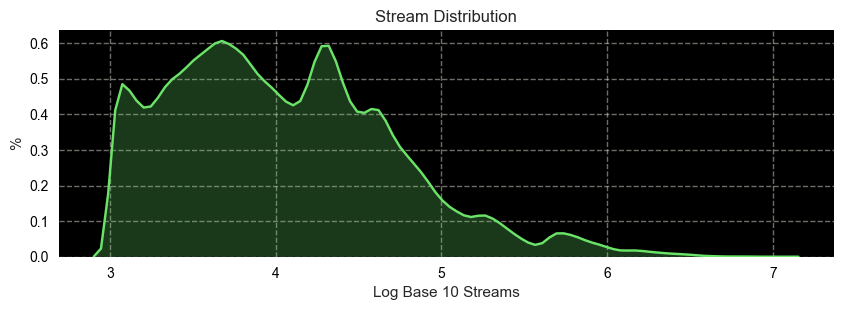

In [10]:
# reformat "1000" to "1E4"
pd.options.display.float_format = '{:.2E}'.format

plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(10,3), dpi=100)
# figure background color
fig.patch.set_facecolor('white')

# Grid Color
ax.tick_params(colors='black',
               grid_color='#e0dbd1', grid_alpha=0.5)
ax.grid(which='major', axis='both', linestyle='--')

# axis foreground color
ax.set_facecolor('black')
sns.distplot(np.log10(df['Streams']), hist=False, kde_kws={"shade": True, "color": "#6AE368"})
plt.title('Stream Distribution')
plt.xlabel('Log Base 10 Streams')
plt.ylabel('%')
plt.show()

In [11]:
y_2017 = df[df['Date'] < '2018']['Streams']
y_2018 = df[df['Date'] >='2018']['Streams']

In [12]:
y_2017.sum()/df.Streams.sum(), y_2018.sum()/df.Streams.sum()

(0.9759970383321629, 0.024002961667837146)

## Furthermore, 97.6% of the streams sum is from 2017

In [13]:
# # Make a copy of date with dates parsed
# df1 = df.copy()

# # Take subset of data prior to 2018 overlap
# df = df[df['Date'] < '2018']

## What day of the week, and what months experience the most streams?

In [14]:
# create variables for day and month
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month_name()

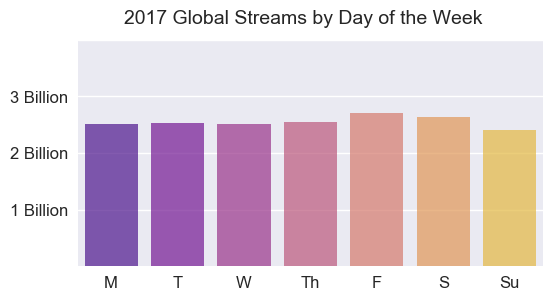

In [15]:
sns.set_style()

fig, ax = plt.subplots(1, 1, figsize=(6,3), dpi=100)
fig.suptitle('2017 Global Streams by Day of the Week', fontsize=14, ha='center')


sums = df.groupby('day_of_week')['Streams'].agg(np.sum)
ax = sns.barplot(x=sums.index, y=sums.values, palette="plasma", alpha=.7)
plt.yticks(np.arange(10**10,(4.5*10**10), (10**10)), ['1 Billion', '2 Billion', '3 Billion'], rotation=0, fontsize=12)
plt.xticks(np.arange(7), ['M','T','W','Th','F','S','Su'], rotation=0, fontsize=12)
plt.xlabel('')
plt.show()

### Totals appear pretty consistent throughout the week
## What's a bigger party night, Friday? or Saturday?

In [16]:
fri = df[df['day_of_week'] == 4]
sat = df[df['day_of_week'] == 5]
weekday = df[~df['day_of_week'].isin([4,5])]
weekend = df[df['day_of_week'].isin([4,5])]

for day, value in [['Friday', fri], ['Saturday', sat], ['weekday', weekday], ['weekend', weekend]]:
    print('\n '+ day +' Stats\n') 
    display(value['Streams'].describe())



 Friday Stats



count   4.91E+05
mean    5.50E+04
std     2.14E+05
min     1.00E+03
25%     3.36E+03
50%     9.43E+03
75%     3.12E+04
max     9.89E+06
Name: Streams, dtype: float64


 Saturday Stats



count   4.94E+05
mean    5.35E+04
std     2.08E+05
min     1.00E+03
25%     3.35E+03
50%     9.29E+03
75%     3.06E+04
max     1.14E+07
Name: Streams, dtype: float64


 weekday Stats



count   2.46E+06
mean    5.09E+04
std     1.98E+05
min     1.00E+03
25%     3.31E+03
50%     9.18E+03
75%     2.92E+04
max     9.85E+06
Name: Streams, dtype: float64


 weekend Stats



count   9.84E+05
mean    5.43E+04
std     2.11E+05
min     1.00E+03
25%     3.36E+03
50%     9.36E+03
75%     3.09E+04
max     1.14E+07
Name: Streams, dtype: float64

## Means and medians appear similar

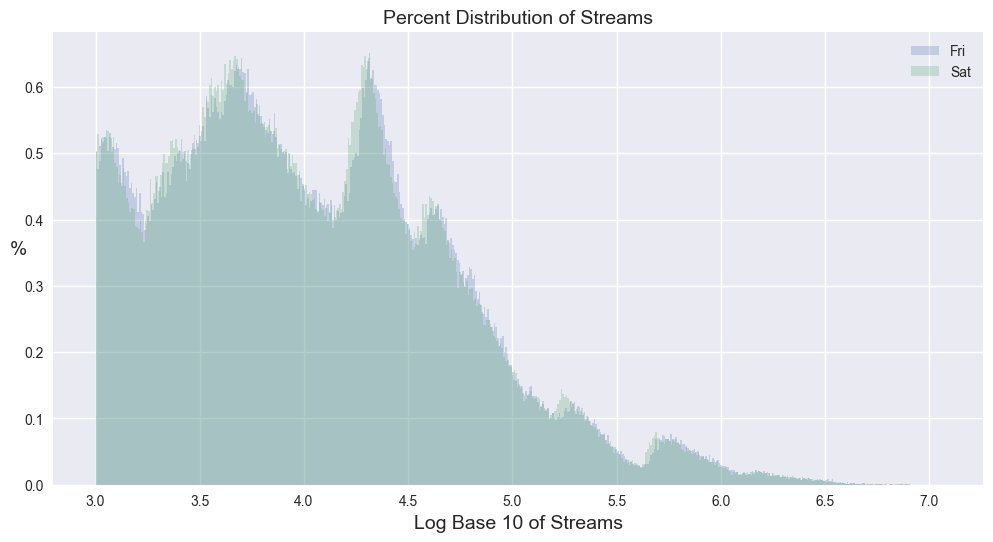

In [17]:
plt.figure(figsize=(12,6), dpi=100)
plt.title('Percent Distribution of Streams', fontsize=14)
np.log10(fri['Streams']).hist(alpha=0.25, density=True, bins=500)
np.log10(sat['Streams']).hist(alpha=0.25, density=True, bins=500)
# np.log10(weekday['Streams']).hist(alpha=0.25, density=True, bins=500)
# np.log10(weekend['Streams']).hist(alpha=0.25, density=True, bins=500)
plt.legend(['Fri', 'Sat', 'weekday', 'weekend'])
plt.xlabel('Log Base 10 of Streams', fontsize=14)
plt.ylabel('%', rotation=0, fontsize=14)
plt.show()

In [18]:
from scipy.stats import ttest_ind, ttest_1samp

# Do a 1 sample ttest to compare friday, and saturday to the population mean
print('\nMean Fri and mean Sat vs all')
print(100*'*')
print('Friday:', ttest_1samp(fri['Streams'], df.Streams.mean()))
print('Saturday:', ttest_1samp(sat['Streams'], df.Streams.mean()))
print()
print('\nMean weekend and mean weekday vs all')
print(100*'*')
print('Weekend:', ttest_1samp(weekend['Streams'], df.Streams.mean()))
print('Weekday:', ttest_1samp(weekday['Streams'], df.Streams.mean()))
print()

# Do a 2-sided ttest to compare dri and sat to weekends
print('\nMean Fri and mean Sat vs weekend')
print(100*'*')
print('Friday:', ttest_ind(fri['Streams'], weekend.Streams))
print('Saturday:', ttest_ind(sat['Streams'], weekend.Streams))
print()

# Do a 2-sided ttest to compare dri and sat to weekdays
print('\nMean Fri and mean Sat vs weekday')
print(100*'*')
print('Friday:',ttest_ind(fri['Streams'], weekday.Streams))
print('Saturday:', ttest_ind(sat['Streams'], weekday.Streams))
print()

# Do a 2-sided ttest to compare dri and sat to weekend
print('\nMean fri vs saturday')
print(100*'*')
display(ttest_ind(fri['Streams'], sat['Streams']))
print()

#Finally compare weekend and weekday
print('\nMean weekend vs weekday')
print(100*'*')
display(ttest_ind(weekend['Streams'], weekday['Streams']))



Mean Fri and mean Sat vs all
****************************************************************************************************
Friday: Ttest_1sampResult(statistic=10.245337300712071, pvalue=1.2490330190011823e-24)
Saturday: Ttest_1sampResult(statistic=5.57728431369931, pvalue=2.4442970274255593e-08)


Mean weekend and mean weekday vs all
****************************************************************************************************
Weekend: Ttest_1sampResult(statistic=11.23479767357463, pvalue=2.7625628291794155e-29)
Weekday: Ttest_1sampResult(statistic=-7.575349165707036, pvalue=3.5828721707148535e-14)


Mean Fri and mean Sat vs weekend
****************************************************************************************************
Friday: Ttest_indResult(statistic=2.0132866255341955, pvalue=0.04408466584597744)
Saturday: Ttest_indResult(statistic=-2.026296990894157, pvalue=0.04273453863335549)


Mean Fri and mean Sat vs weekday
*******************************************

Ttest_indResult(statistic=3.4983048378238473, pvalue=0.0004682462770806043)



Mean weekend vs weekday
****************************************************************************************************


Ttest_indResult(statistic=13.89804202708027, pvalue=6.527638419373416e-44)

## Friday mean streams have 3.5 standard errors (SE) difference from Saturday mean
    and 13 SE difference from the weekday mean
## Saturday has 5.5 SE differnce from the average day's mean
    and 8.5 SE difference from the weekday mean
    
### Weekend mean is 14 SE different from the weekday

- So Weekends stream more than weekdays
- Fridays stream more than Saturdays

## Look at monthly totals for the year

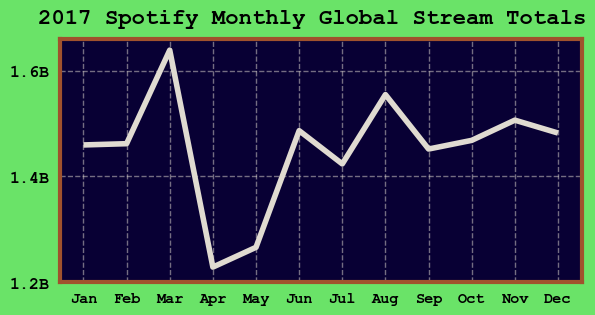

In [19]:
import matplotlib as mpl

# Set font params through mpl
mpl.rcParams['font.family'] = "Courier New"
mpl.rcParams['font.weight'] = 'bold'

# Use plt style 
plt.style.use('fivethirtyeight')

# Create figure object, and plot axes on top 
fig, ax = plt.subplots(1, 1, figsize=(6,3), dpi=100)
fig.suptitle('2017 Spotify Monthly Global Stream Totals', fontsize=16, ha='center', color='black', fontweight='bold')

# Aggregate sums of streams by month
sums = df[df['Date'] < '2018-01-01'].groupby(['month'])['Streams'].agg(np.sum)

# Set axes object equal to a seaborn line plot of the sums
ax = sns.lineplot(data=sums, color="#e0dbd1",dashes=True)

# Create a list of values and labels and add Styles for x and y ticks
plt.yticks(np.arange(1.2*10**10,(1.8*10**10), .2*10**10), ['1.2B', '1.4B', '1.6B'], fontsize=12)
plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=11)

# Set tick params for both axes
ax.tick_params(colors='black', rotation=0, 
               grid_color='#e0dbd1', grid_alpha=0.5)
ax.grid(which='major', axis='both', linestyle='--')

# figure background color
fig.patch.set_facecolor('#6AE368')

# axis foreground color
ax.set_facecolor('#080034')

# axis Border color
spine_color = 'sienna'
for pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[pos].set_color(spine_color)

plt.show()

# Reset matplotlib params
mpl.rcParams.update(mpl.rcParamsDefault)

## Drop 657 tracks that have no Artist or Track Name

In [20]:
df.Artist.isna().value_counts()

False    3440540
True         657
Name: Artist, dtype: int64

In [21]:
# Validate all artists and track names are the same missing
(df['Artist'].isna() == df['Track Name'].isna()).all()

True

In [22]:
# drop null rows
df = df.dropna(axis=0)

# Use 2017 data
# df = df[df['Date']< '2018']

## How many unique tracks and artists are on this list?
- try counting unique URLs
- Try concatenating artist and track name

In [23]:
print(format(len(df.URL.unique()), ','), "Unique URLs")

21,738 Unique URLs


In [24]:
print(format(len(df['Artist'].str.cat(others=df['Track Name'], sep=' - ').unique()), ','), "unique track names")

19,922 unique track names


In [25]:
print(format(len(df.Artist.unique()), ','), "Unique Artists")

6,628 Unique Artists


In [26]:
print(len(df.Region.unique()), "Regions")

54 Regions


In [27]:
# Create a series with the track string
df['title'] = df['Artist'].str.cat(others=df['Track Name'], sep=' - ')

In [28]:
df.Region.value_counts()[df.Region.value_counts()==df.Region.value_counts().loc['us']]

ec    74184
it    74184
cr    74184
ch    74184
co    74184
pt    74184
us    74184
mx    74184
Name: Region, dtype: int64

A group of regions that includes the ```'us'``` contain ```72,384``` tracks

In [29]:
print(df.Region.value_counts().loc[:'global'].value_counts().sum(),
      "countries have close to 72,000")

36 countries have close to 72,000


## The remaining stream count by region is below

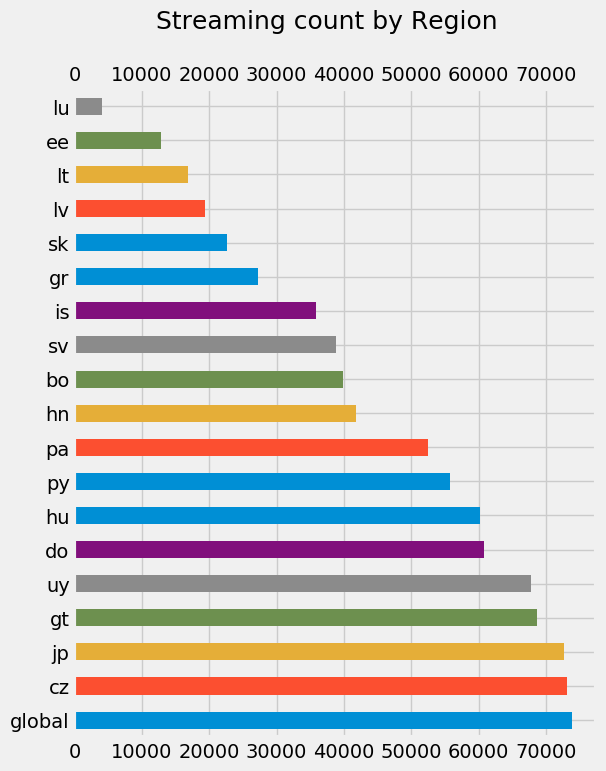

In [30]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 1, figsize=(6,8), dpi=100)
ax = df.Region.value_counts().loc['global':].plot.barh()
ax.xaxis.set_tick_params(labeltop=True)

fig.suptitle('Streaming count by Region', fontsize=18, ha='center')
plt.show()

In [31]:
df1 = df.copy()

## It appears that nearly all regions with the exception of ```"cz":"lu"``` have the nearly the same number of songs
    Let's take a look at the us region

In [32]:
df = df[df.Region=='us']

## Which tracks have the most number 1's?

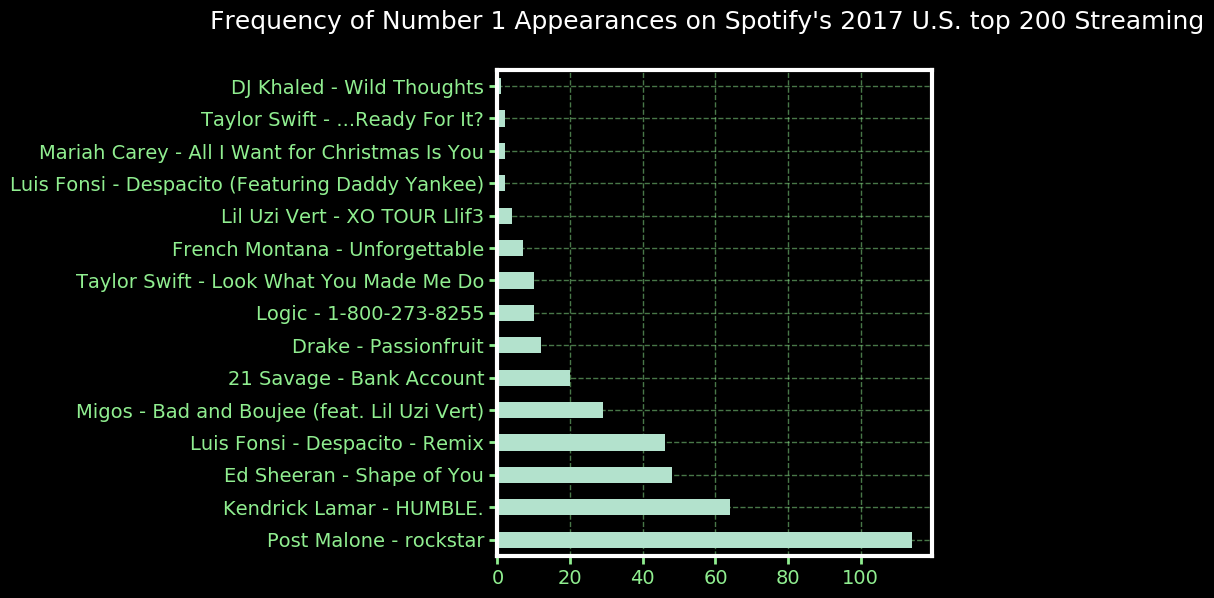

In [33]:
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1, figsize=(5,6), dpi=100)
ax = df[df.Position==1].title.value_counts()[:15].plot(kind='barh', colormap='Pastel2')
fig.suptitle('Frequency of Number 1 Appearances on Spotify\'s 2017 U.S. top 200 Streaming', fontsize=18, ha='center')
ax.tick_params(direction='out', length=6, width=2, colors='lightgreen',
               grid_color='lightgreen', grid_alpha=0.5)
# Grid Color
ax.tick_params(colors='lightgreen',
               grid_color='lightgreen', grid_alpha=0.5)
ax.grid(which='major', axis='both', linestyle='--')

plt.savefig('../Desktop/spotty2.png', bbox_inches='tight')
plt.show()

In [34]:
df[(df.title=='Post Malone - rockstar')]['Date'].min()

Timestamp('2017-09-15 00:00:00')

# Post Malone - rockstar was released on Friday, September 15, 2017
    It debuted at number 2 with 1,551,995 Streams

In [35]:
df[(df.title=='Post Malone - rockstar')&(df.Date == '2017-09-15')]

,Position,Track Name,Artist,Streams,URL,Date,Region,day_of_week,month,title
822423,2,rockstar,Post Malone,1551995,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-09-15,us,4,September,Post Malone - rockstar


## Which days did rockstar get the most streams while at number 1?
    and which was rockstar's worst day at number 1?

In [36]:
display(df[(df.title=='Post Malone - rockstar')].sort_values(by='Streams', ascending=False).head(1))
display(df[(df.title=='Post Malone - rockstar')].sort_values(by='Streams', ascending=True).head(1))

,Position,Track Name,Artist,Streams,URL,Date,Region,day_of_week,month,title
825222,1,rockstar,Post Malone,2905678,https://open.spotify.com/track/1OmcAT5Y8eg5bUP...,2017-09-29,us,4,September,Post Malone - rockstar


,Position,Track Name,Artist,Streams,URL,Date,Region,day_of_week,month,title
842631,10,rockstar,Post Malone,1176450,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-12-25,us,0,December,Post Malone - rockstar


In [37]:
df[(df.title=='Post Malone - rockstar')]['Position'].value_counts()

1     114
2       2
10      1
Name: Position, dtype: int64

rockstar spent 114/117 days at number 1 between Friday September 29, and Sunday January 7

## Which days, and what position did rockstar take on the days it was not number 1?

In [38]:
df[(df.title=='Post Malone - rockstar') & (df['Position'] > 1)]

,Position,Track Name,Artist,Streams,URL,Date,Region,day_of_week,month,title
822423,2,rockstar,Post Malone,1551995,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-09-15,us,4,September,Post Malone - rockstar
842423,2,rockstar,Post Malone,1390212,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-12-24,us,6,December,Post Malone - rockstar
842631,10,rockstar,Post Malone,1176450,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-12-25,us,0,December,Post Malone - rockstar


## rockstar's worst days were Christmas Eve and Christmas Day, followed by it's debut on Sept 15, 2017

In [39]:
# reformat "1000" to "1E4"
# pd.options.display.float_format = '{:.2E}'.format

In [40]:
# format Sci-Notation to "1E4" to "1,000" for display 
pd.options.display.float_format = '{:,.0f}'.format

grouped = df[df.Artist=='Post Malone'].groupby(['Track Name'])

grouped['Streams'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Track Name,,,,,,,,
rockstar,117,"2,034,301","450,030","1,176,450","1,669,901","2,039,320","2,438,535","2,905,678"
I Fall Apart,116,"945,706","257,314","163,464","915,274","997,066","1,096,159","1,275,320"
Congratulations,371,"769,410","216,751","192,751","662,828","769,936","918,482","1,264,607"
Candy Paint,226,"421,364","266,275","157,460","205,348","299,310","685,121","1,088,651"
Go Flex,371,"282,734","106,422","144,845","218,324","238,534","333,792","687,250"
White Iverson,371,"277,199","38,459","209,199","245,144","272,143","297,616","393,624"
No Option,111,"215,709","22,171","165,016","197,384","218,554","229,724","268,030"
Congratulations - Remix,30,"210,078","38,835","146,824","173,488","207,290","243,472","269,527"
Deja Vu,114,"196,809","17,856","154,228","182,804","198,516","210,876","228,897"


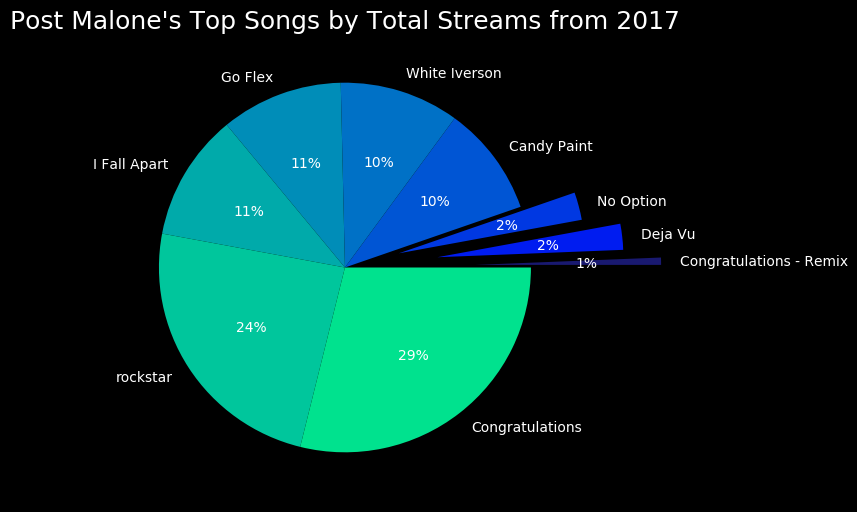

In [41]:
# Reset matplotlib params
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use('dark_background')
pd.options.display.float_format = '{:,.0f}'.format
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
explode = [0.7,0.5,0.3,0,0,0,0,0,0]

plt.title('Post Malone\'s Top Songs by Total Streams from 2017', fontsize=18)
df[df['Artist'] == 'Post Malone'].groupby('Track Name').agg(np.sum)['Streams'].sort_values().plot(kind='pie', colors=colors,
                explode=explode,
                  figsize=(6, 6),
                  autopct='%0.0f%%',
                  shadow=False)
plt.ylabel('')
plt.show()

# Reset matplotlib params
mpl.rcParams.update(mpl.rcParamsDefault)

## which has more mean streams congratulations or rockstar?

In [42]:
df[(df.Artist=='Post Malone')&(df['Track Name'].isin(['Congratulations', 'rockstar']))].groupby('Track Name')['Streams'].agg([np.sum, np.mean, np.median])

,sum,mean,median
Track Name,,,
Congratulations,285451131,"769,410",769936
rockstar,238013267,"2,034,301",2039320


In [43]:
df[(df.Artist=='Post Malone')&(df['Track Name'].str.contains(r'Congratulations'))].groupby('Track Name')['Streams'].describe()

,count,mean,std,min,25%,50%,75%,max
Track Name,,,,,,,,
Congratulations,371,"769,410","216,751","192,751","662,828","769,936","918,482","1,264,607"
Congratulations - Remix,30,"210,078","38,835","146,824","173,488","207,290","243,472","269,527"


In [44]:
df[(df.Artist=='Post Malone')&(df['Track Name'].isin(['Congratulations', 'rockstar', 'Congratulations - Remix']))].groupby('Track Name')['Streams'].agg([np.sum, np.mean, np.median])

,sum,mean,median
Track Name,,,
Congratulations,285451131,"769,410","769,936"
Congratulations - Remix,6302331,"210,078","207,290"
rockstar,238013267,"2,034,301","2,039,320"


include congratulations remix in analysis

In [45]:
con = df[(df.Artist=='Post Malone')&(df['Track Name'].str.contains(r'Congratulations'))]
roc = df[(df.Artist=='Post Malone')&(df['Track Name']=='rockstar')]
pos = df[(df.Artist=='Post Malone')]

con_roc = df[(df.Artist=='Post Malone')&((df['Track Name'].str.contains(r'Congratulations'))|(df['Track Name']=='rockstar'))]
no_cr = df[(df.Artist=='Post Malone')&~((df['Track Name'].str.contains(r'Congratulations'))|(df['Track Name']=='rockstar'))]

In [46]:
print('Congratulations Stats', '\n'+100*'*')
display(con.Streams.describe())
print('rockstar Stats', '\n'+100*'*')
display(roc.Streams.describe())
print('Congrats or rockstar', '\n'+100*'*')
display(con_roc.Streams.describe())
print('not congrats or rockstar', '\n'+100*'*')
display(no_cr.Streams.describe())
print('Post Malone Stats', '\n'+100*'*')
display(pos.Streams.describe())

Congratulations Stats 
****************************************************************************************************


count         401
mean      727,565
std       255,490
min       146,824
25%       623,882
50%       751,399
75%       913,037
max     1,264,607
Name: Streams, dtype: float64

rockstar Stats 
****************************************************************************************************


count         117
mean    2,034,301
std       450,030
min     1,176,450
25%     1,669,901
50%     2,039,320
75%     2,438,535
max     2,905,678
Name: Streams, dtype: float64

Congrats or rockstar 
****************************************************************************************************


count         518
mean    1,022,716
std       628,564
min       146,824
25%       671,892
50%       851,290
75%     1,118,411
max     2,905,678
Name: Streams, dtype: float64

not congrats or rockstar 
****************************************************************************************************


count       1,309
mean      350,684
std       245,809
min       144,845
25%       215,783
50%       246,858
75%       341,542
max     1,275,320
Name: Streams, dtype: float64

Post Malone Stats 
****************************************************************************************************


count       1,827
mean      541,222
std       496,929
min       144,845
25%       226,325
50%       291,786
75%       751,066
max     2,905,678
Name: Streams, dtype: float64

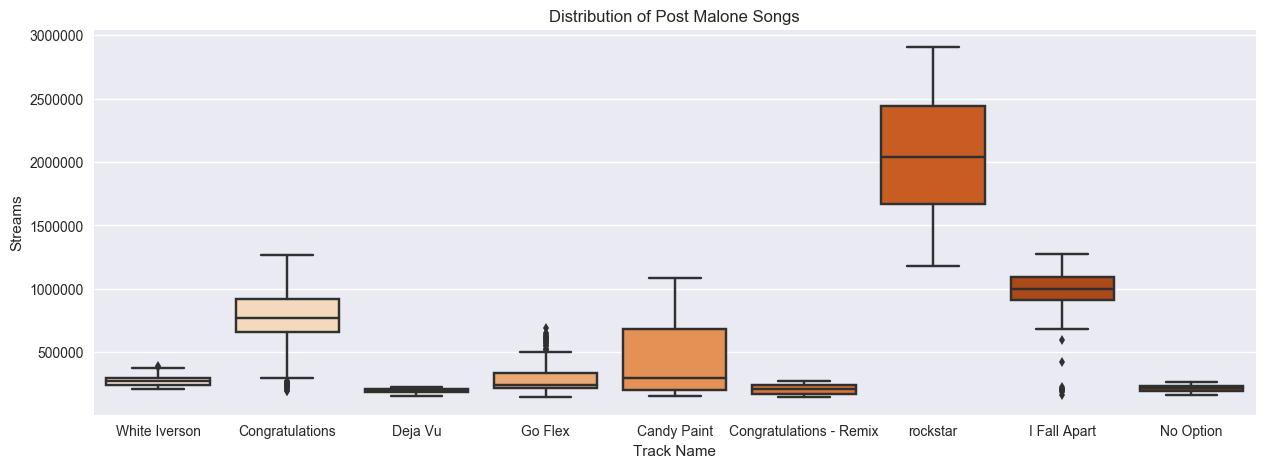

In [47]:
plt.figure(figsize=(15,5))
plt.style.use('seaborn')
sns.boxplot(data=df[df.Artist=='Post Malone'], x='Track Name', y='Streams', palette='Oranges')
plt.title('Distribution of Post Malone Songs')
plt.show()

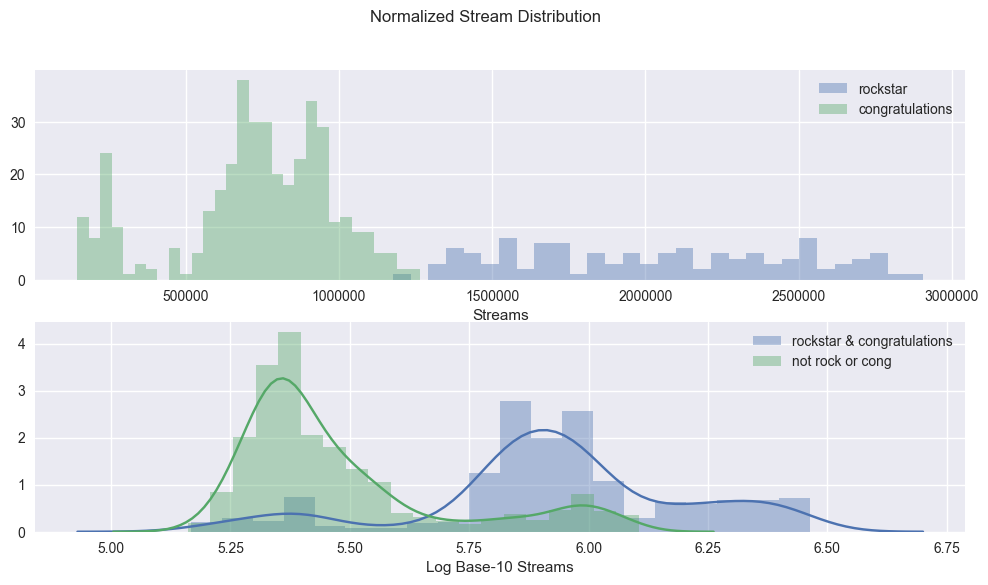

In [48]:
from scipy.stats import norm

fig = plt.figure(figsize=(12,6), dpi=100)
fig.suptitle('Normalized Stream Distribution')
plt.style.use('seaborn')
ax = plt.subplot(211)
ax = sns.distplot(roc['Streams'], bins=30, kde=False)
ax = sns.distplot(con['Streams'], bins=30, kde=False)
ax = plt.legend(['rockstar', 'congratulations'])

ax1 = plt.subplot(212)
ax1 = sns.distplot(np.log10(con_roc['Streams']), bins=20, kde=True)
ax1 = sns.distplot(np.log10(no_cr['Streams']), bins=20, kde=True)
ax1 = plt.legend(['rockstar & congratulations', 'not rock or cong'])
ax1 = plt.xlabel('Log Base-10 Streams')
plt.show()

In [49]:
from scipy.stats import ttest_ind, ttest_1samp

# Do a 1 sample ttest to compare friday, and saturday to the population mean
print('\nMean rockstar and congrats vs all')
print(100*'-')
print('rockstar:', ttest_1samp(roc['Streams'], pos.Streams.mean()))
print('Congratulations:', ttest_1samp(con['Streams'], pos.Streams.mean()))
print()
print('\nMean rockstar and congrats vs all')
print(100*'-')
print('conroc:', ttest_1samp(con_roc['Streams'], pos.Streams.mean()))
print('no_cr:', ttest_1samp(no_cr['Streams'], pos.Streams.mean()))
print()

print('\nMean Rockstar vs Congratulations')
print(100*'-')
display(ttest_ind(roc['Streams'], con['Streams'], equal_var=False))
print()

print('\nMean con_roc vs no_cr')
print(100*'-')
display(ttest_ind(con_roc['Streams'], no_cr['Streams'], equal_var=False))



Mean rockstar and congrats vs all
----------------------------------------------------------------------------------------------------
rockstar: Ttest_1sampResult(statistic=35.8867603894358, pvalue=1.2049317883021736e-64)
Congratulations: Ttest_1sampResult(statistic=14.605323189274793, pvalue=5.048724115752412e-39)


Mean rockstar and congrats vs all
----------------------------------------------------------------------------------------------------
conroc: Ttest_1sampResult(statistic=17.434378630855992, pvalue=6.994066965192277e-54)
no_cr: Ttest_1sampResult(statistic=-28.04487550005233, pvalue=6.7384203780735086e-136)


Mean Rockstar vs Congratulations
----------------------------------------------------------------------------------------------------


Ttest_indResult(statistic=30.027761831285982, pvalue=1.6792244105978458e-62)



Mean con_roc vs no_cr
----------------------------------------------------------------------------------------------------


Ttest_indResult(statistic=23.629052507729018, pvalue=5.307268401196948e-87)

## rockstar and Congratulations had the greatest difference of 30 SE
    So Rockstar was significantly hotter in terms of mean streams

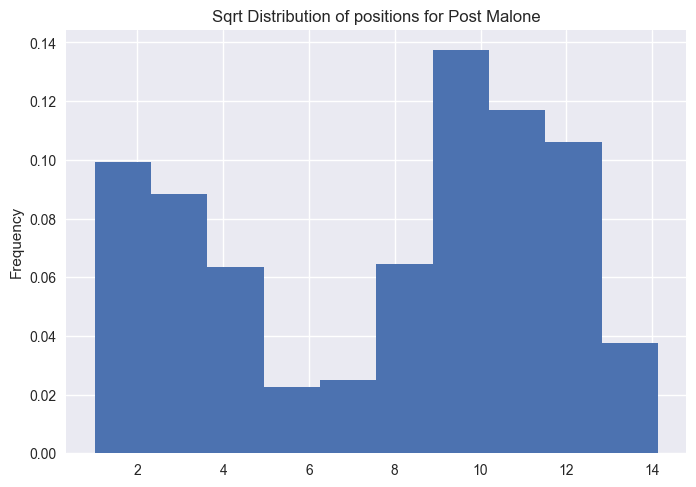

In [50]:
plt.title('Sqrt Distribution of positions for Post Malone')
plt.style.use('seaborn')
np.sqrt(df[df.Artist=='Post Malone'].Position).plot.hist(density=True)
plt.show()

## What are the highest and lowest positions for each Post Malone Song

In [51]:
display(df[(df.Artist=='Post Malone')].groupby('Track Name').agg(np.min).sort_values(by='Streams', ascending=False))
print()
display(df[(df.Artist=='Post Malone')].groupby('Track Name').agg(np.max).sort_values(by='Streams', ascending=False))
print()
display(df[(df.Artist=='Post Malone')].groupby('Track Name').agg(np.median).sort_values(by='Streams', ascending=False))
print()
display(df[(df.Artist=='Post Malone')].groupby('Track Name')['Position'].describe())

,Position,Artist,Streams,URL,Date,Region,day_of_week,month,title
Track Name,,,,,,,,,
rockstar,1,Post Malone,1176450,https://open.spotify.com/track/1OmcAT5Y8eg5bUP...,2017-09-15,us,0,December,Post Malone - rockstar
White Iverson,56,Post Malone,209199,https://open.spotify.com/track/6eT7xZZlB2mwyzJ...,2017-01-01,us,0,April,Post Malone - White Iverson
Congratulations,5,Post Malone,192751,https://open.spotify.com/track/3a1lNhkSLSkpJE4...,2017-01-01,us,0,April,Post Malone - Congratulations
No Option,104,Post Malone,165016,https://open.spotify.com/track/6M0IsaUX4GNyto4...,2017-09-18,us,0,December,Post Malone - No Option
I Fall Apart,2,Post Malone,163464,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,2017-09-15,us,0,December,Post Malone - I Fall Apart
Candy Paint,4,Post Malone,157460,https://open.spotify.com/track/42CeaId2XNlxugD...,2017-04-18,us,0,April,Post Malone - Candy Paint
Deja Vu,103,Post Malone,154228,https://open.spotify.com/track/0H8XeaJunhvpBdB...,2017-01-01,us,0,February,Post Malone - Deja Vu
Congratulations - Remix,90,Post Malone,146824,https://open.spotify.com/track/2YK01AIIWuywG24...,2017-06-16,us,0,July,Post Malone - Congratulations - Remix
Go Flex,19,Post Malone,144845,https://open.spotify.com/track/5yuShbu70mtHXY0...,2017-01-01,us,0,April,Post Malone - Go Flex


,Position,Artist,Streams,URL,Date,Region,day_of_week,month,title
Track Name,,,,,,,,,
rockstar,10,Post Malone,2905678,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-09,us,6,September,Post Malone - rockstar
I Fall Apart,191,Post Malone,1275320,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,2018-01-09,us,6,September,Post Malone - I Fall Apart
Congratulations,117,Post Malone,1264607,https://open.spotify.com/track/3a1lNhkSLSkpJE4...,2018-01-09,us,6,September,Post Malone - Congratulations
Candy Paint,200,Post Malone,1088651,https://open.spotify.com/track/6VFMGKuYTlaYgbh...,2018-01-09,us,6,September,Post Malone - Candy Paint
Go Flex,192,Post Malone,687250,https://open.spotify.com/track/5yuShbu70mtHXY0...,2018-01-09,us,6,September,Post Malone - Go Flex
White Iverson,169,Post Malone,393624,https://open.spotify.com/track/6eT7xZZlB2mwyzJ...,2018-01-09,us,6,September,Post Malone - White Iverson
Congratulations - Remix,191,Post Malone,269527,https://open.spotify.com/track/2YK01AIIWuywG24...,2017-07-16,us,6,June,Post Malone - Congratulations - Remix
No Option,200,Post Malone,268030,https://open.spotify.com/track/6M0IsaUX4GNyto4...,2018-01-09,us,6,September,Post Malone - No Option
Deja Vu,200,Post Malone,228897,https://open.spotify.com/track/0H8XeaJunhvpBdB...,2017-11-13,us,6,September,Post Malone - Deja Vu


,Position,Streams,day_of_week
Track Name,,,
rockstar,1,"2,039,320",3
I Fall Apart,4,"997,066",3
Congratulations,14,"769,936",3
Candy Paint,83,"299,310",3
White Iverson,90,"272,143",3
Go Flex,108,"238,534",3
No Option,147,"218,554",3
Congratulations - Remix,128,"207,290",3
Deja Vu,144,"198,516",3


,count,mean,std,min,25%,50%,75%,max
Track Name,,,,,,,,
Candy Paint,226,84,58,4,21,83,132,200
Congratulations,371,20,19,5,9,14,21,117
Congratulations - Remix,30,136,37,90,98,128,175,191
Deja Vu,114,149,29,103,126,144,176,200
Go Flex,371,103,37,19,70,108,133,192
I Fall Apart,116,17,43,2,3,4,5,191
No Option,111,149,23,104,133,147,164,200
White Iverson,371,92,18,56,80,90,101,169
rockstar,117,1,1,1,1,1,1,10


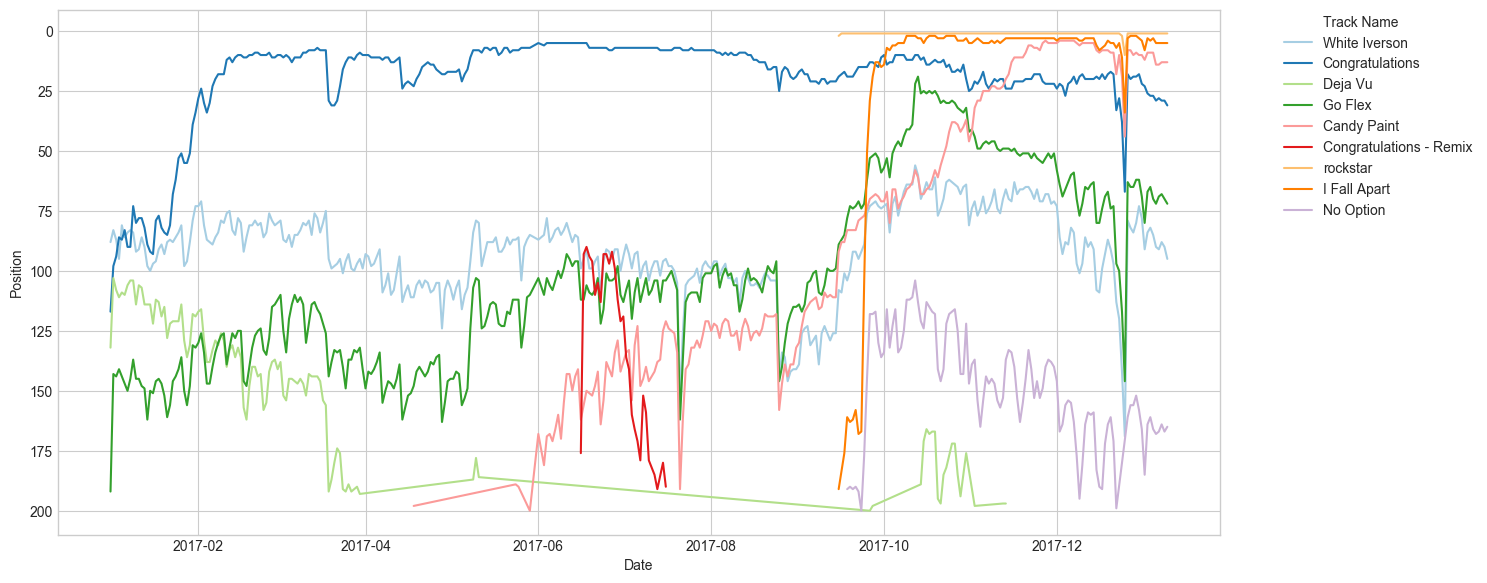

In [52]:
# Reset matplotlib params
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,15), dpi=100)
ax = plt.subplot(211)
# ax = sns.lineplot(x='Date', y='Streams', hue='Track Name', data=df[df.Artist=='Post Malone'], palette="Paired")

# ax1 = plt.subplot(212)

ax = sns.lineplot(x='Date', y='Position', hue='Track Name', data=df[(df.Artist=='Post Malone')], palette="Paired", legend='brief',)
ax = plt.gca().invert_yaxis()


plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


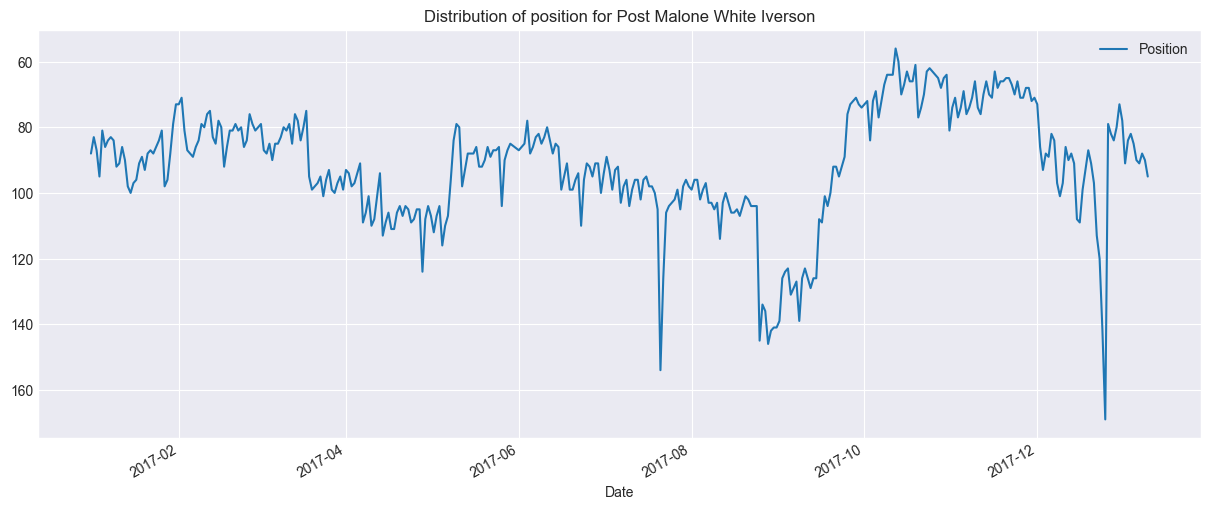

In [53]:
sns.set_style('darkgrid')
ax = df[(df['Track Name']=='White Iverson')].plot(x='Date', y='Position', figsize=(15,6))
ax = plt.gca().invert_yaxis()
plt.title("Distribution of position for Post Malone White Iverson")
plt.show()

## Which artists have the most appearances?

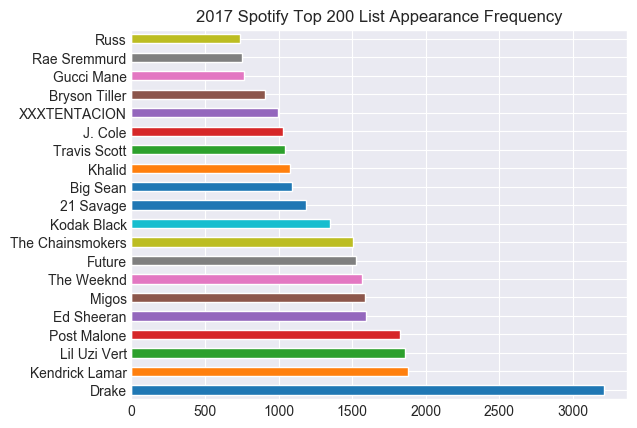

In [54]:
df.Artist.value_counts().head(20).plot(kind='barh')
plt.title('2017 Spotify Top 200 List Appearance Frequency')
plt.show()

## Look at the time series plot of the total streams

In [55]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

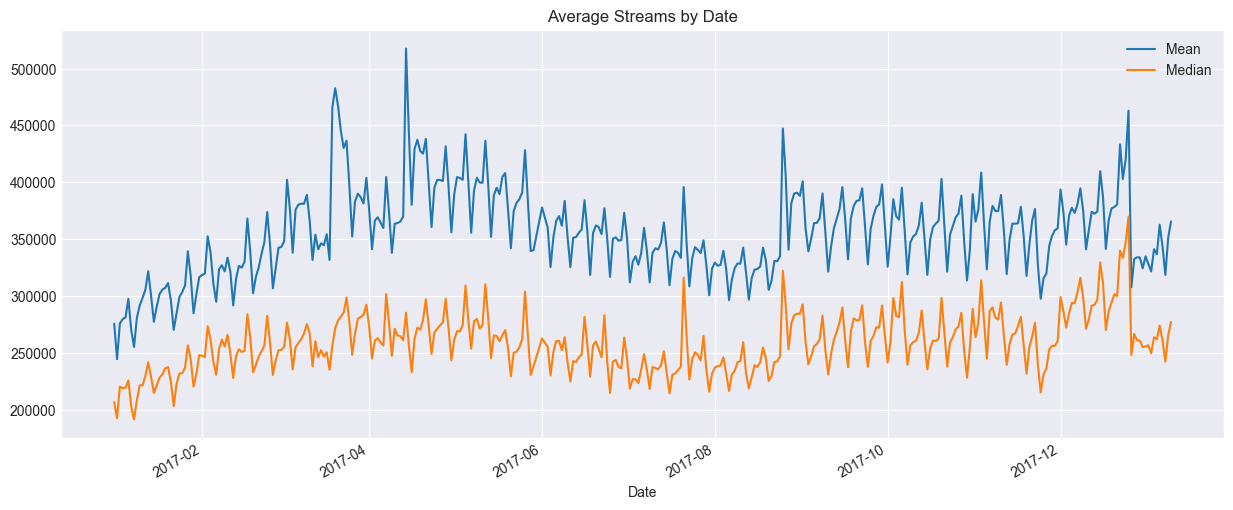

In [56]:
from scipy.stats import mode

ax = df.groupby(['Date']).agg(np.mean)['Streams'].plot(x='Date', y='Streams', figsize=(15,6))
ax = df.groupby(['Date']).agg(np.median)['Streams'].plot(x='Date', y='Streams', figsize=(15,6))
plt.legend(['Mean', 'Median'])
plt.title('Average Streams by Date')
plt.show()

## The mean is always higher, which suggests that median might be a better measure of central tendency
    The total streams apear to be lowest at the beginning of the year, and highest around Christmas

In [57]:
print(format(df.shape[0], ','), "Song-Days")

74,184 Song-Days


In [58]:
print(format(len(df.Artist.unique()), ','), "Unique-artists")

487 Unique-artists


In [59]:
print(len(df.Region.unique()), "Unique Regions")

1 Unique Regions


## Look at sum of streams for each artist

In [60]:
streams_sum = df.groupby('Artist').agg(np.sum).sort_values(by='Streams', ascending=False)

## Which artists accumulated over 1 Billion Streams in the U.S. in 2017?

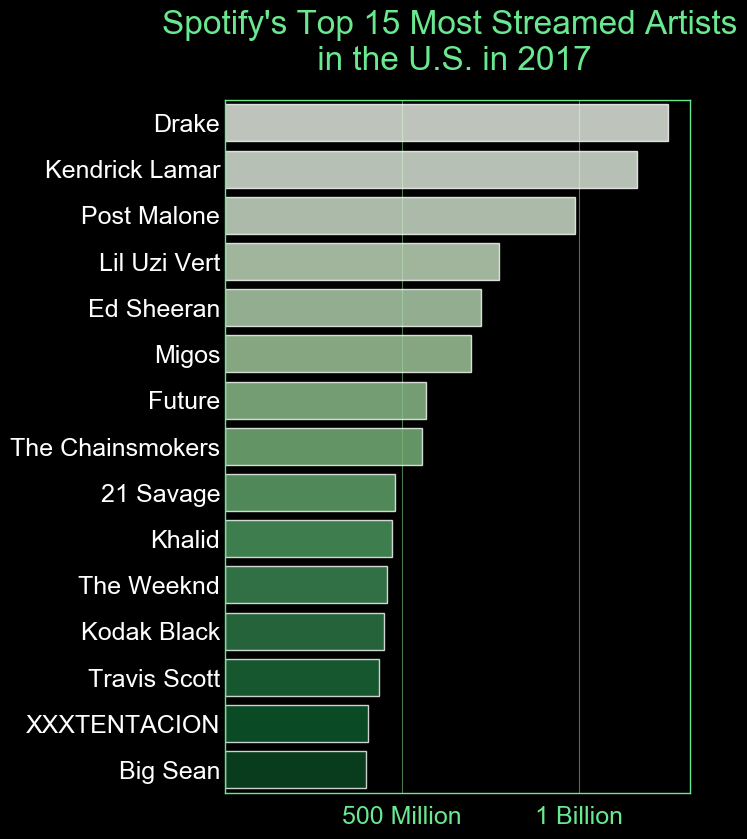

In [61]:
import seaborn as sns
stm = streams_sum.head(15)

plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1, figsize=(6,9), dpi=100)
fig.suptitle('Spotify\'s Top 15 Most Streamed Artists\n in the U.S. in 2017', fontsize=24, color='#6ae890', ha='center')
x = stm.Streams
y = stm.index
ax = sns.barplot(y=y, x=x, orient='h', palette="Greens", alpha=0.8)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(axis='x', direction='out', length=6, width=2, colors='#6ae890',
               grid_color='lightgreen', grid_alpha=0.5)

plt.xticks(np.arange((5*10**8),(1.2*10**9), (5*10**8)), ['500 Million', '1 Billion'], rotation=0, fontsize=18)
ax.tick_params(axis='y', colors='white')
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color('#6ae890')

ax.set_yticklabels(y, fontsize=18)


plt.savefig('../Desktop/top_artists.png', bbox_inches='tight')
plt.show()

Drake and Kendrick both hit over 1 Billion Streams in the U.S.

## what are the top 10 songs by stream count?

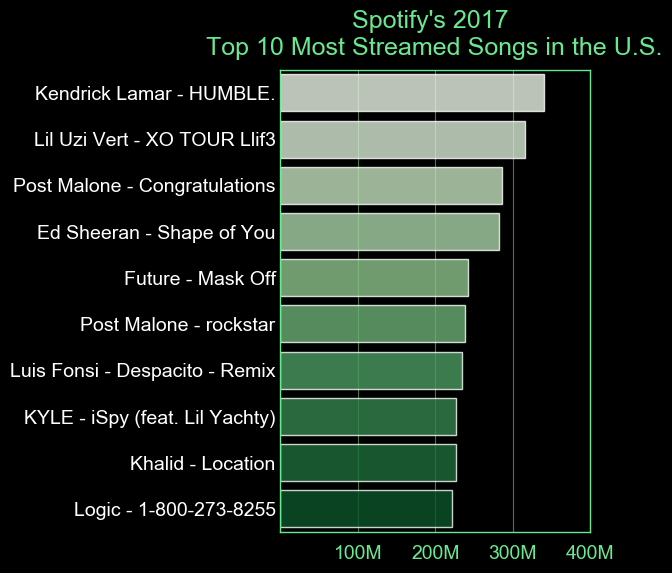

In [62]:
import matplotlib

stm = df.groupby(['title']).sum().sort_values(by='Streams', ascending=False).head(10)

plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1, figsize=(4,6), dpi=100)
fig.suptitle('Spotify\'s 2017\n Top 10 Most Streamed Songs in the U.S.', fontsize=18, color='#6ae890', ha='center')
x = stm.Streams
y = stm.index
ax = sns.barplot(y=y, x=x, orient='h', palette="Greens", alpha=0.8)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(axis='x', direction='out', length=6, width=2, colors='#6ae890',
               grid_color='lightgreen', grid_alpha=0.5)

plt.xticks(np.arange(10**8,(5*10**8), (10**8)), ['100M', '200M', '300M', '400M'], rotation=0, fontsize=14)
ax.tick_params(axis='y', colors='white')
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color('#6ae890')

ax.set_yticklabels(y, fontsize=14)


plt.savefig('../Desktop/top_songs.png', bbox_inches='tight')
plt.show()

# reset defaults
mpl.rcParams.update(mpl.rcParamsDefault)

## What is the artist share of streams in the U.S. and Globally

In [63]:
s = df.groupby('Artist').agg(np.sum)['Streams'].sort_values(ascending=False).head(5).values.tolist()
n = df.groupby('Artist').agg(np.sum)['Streams'].sort_values(ascending=False).head(5).keys().tolist()

s1 = df1.groupby('Artist').agg(np.sum)['Streams'].sort_values(ascending=False).head(5).values.tolist()
n1 = df1.groupby('Artist').agg(np.sum)['Streams'].sort_values(ascending=False).head(5).keys().tolist()

In [64]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": s,
      "labels": n,
      "domain": {"x": [0, .48]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": s1,
      "labels": n1,
#       "text":["Streams"],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"U.S. vs. Global Stream Share",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "U.S.",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Global",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

## From these pie charts we can see that the share of hiphop is larger in the U.S.
### and the share of electronic dance music is larger globally.


In [65]:
# df.title = df.title.str.replace(r'$', '\$')
# df.Artist = df.Artist.str.replace(r'$', '\$')
# plt.style.use('default')
# plt.figure(dpi=150)
# df.groupby('title').agg(np.sum)['Streams'].sort_values(ascending=False)[:500].plot(kind='barh', figsize=(5, 100))
# ax.xaxis.set_tick_params(labeltop=True)
# plt.title('2017 Spotify U.S. Top 1,000 Artists by Streams')
# plt.show()

In [66]:
# plt.style.use('default')
# plt.figure(dpi=150)
# df.groupby('Artist').agg(np.sum)['Streams'].sort_values()[:1000].plot(kind='barh', figsize=(5, 100))
# ax.xaxis.set_tick_params(labeltop=True)
# plt.title('2017 Spotify U.S. Top 1,000 Artists by Streams')
# plt.show()

In [67]:
# plt.style.use('default')
# plt.figure(dpi=100)
# df.Artist.value_counts()[:100].plot(kind='bar', figsize=(20, 10))

# plt.title('Top 100 U.S. Spotify Streaming Appearances by Artist')
# plt.show()

In [68]:
# plt.style.use('fivethirtyeight')
# plt.figure(dpi=100)
# df1.groupby('Artist')['Streams'].sum().sort_values(ascending=False)[:100].plot(kind='bar', figsize=(20, 10))

# plt.title('Top 100 Global Spotify Streaming Appearances by Artist')
# plt.show()

In [69]:
# df[df.Artist.isin(df.Artist.value_counts()[:5].keys())].groupby(['Date', 'Artist', 'Position']).median()

In [70]:
# def printTracks(artist):
#     print("\n"+artist+" had", len(df[df['Artist']==artist]['Track Name'].unique()), "unique songs:")
#     print("\n",df[df['Artist']==artist]['Track Name'].unique())
#     print("\ntotal streams:", format(df[df['Artist']==artist]['Streams'].sum(), ","))
#     print("*"*100)

# for artist in df.Artist.value_counts()[:10].keys().tolist():
#     printTracks(artist)

## Get the sum of streams for each artist
Take a look at mean vs median for each artist

## Which songs have the most Positional variance?

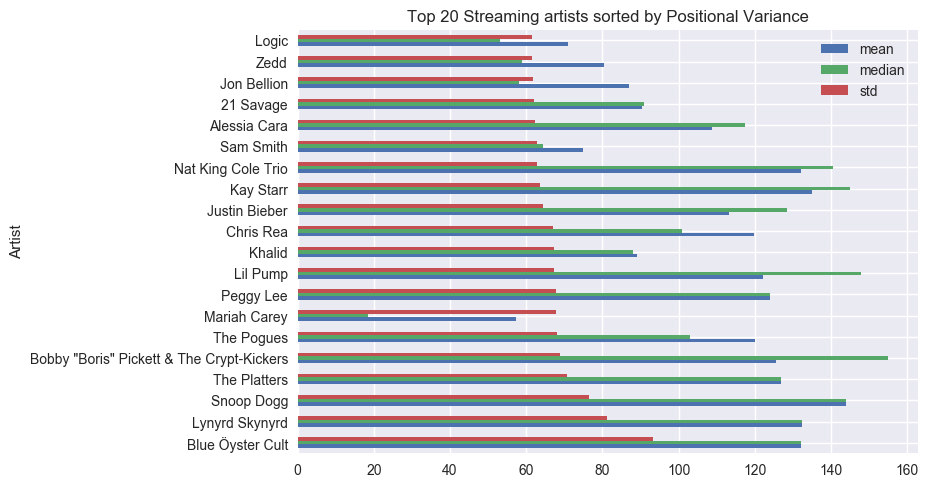

In [71]:
plt.style.use("seaborn")
df.groupby('Artist').agg([np.mean, np.median, np.std])['Position'].sort_values(by=['std'], ascending=False)[:20].plot(kind='barh')
plt.title('Top 20 Streaming artists sorted by Positional Variance')
plt.show()

## Cult Classics seem to dominate in terms of variance, followed by new artists

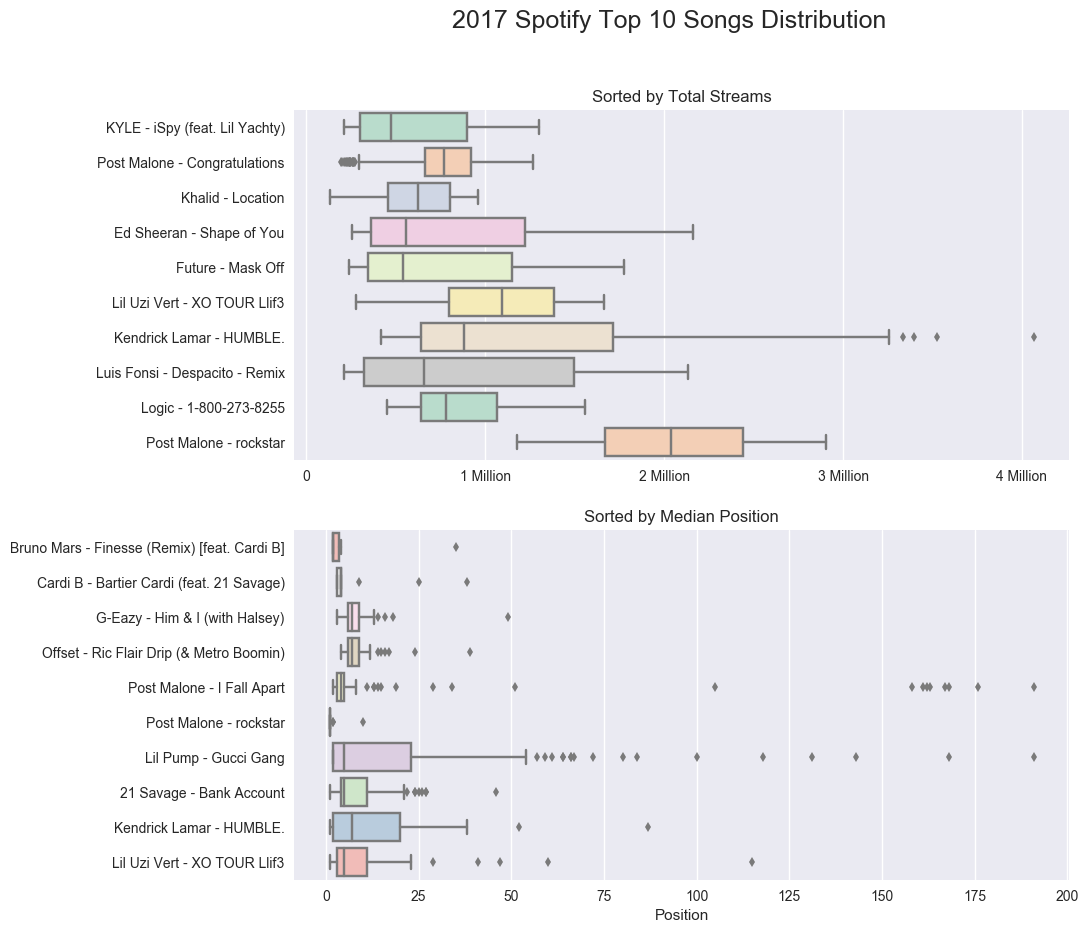

In [72]:
fig = plt.figure(figsize=(10,10))
fig = plt.suptitle('2017 Spotify Top 10 Songs Distribution', fontsize=18)
ax = plt.subplot(211)
data = df[df.title.isin(df.groupby('title').agg([np.sum])['Streams'].sort_values(by='sum', ascending=False).head(10).index.tolist())]
ax = sns.boxplot(x='Streams', y='title', data=data, palette='Pastel2')
ax = plt.title('Sorted by Total Streams')
ax = plt.ylabel(''), plt.xlabel('')
ax = plt.xticks(np.arange(0,5*10**6,10**6), ['0', '1 Million', '2 Million', '3 Million', '4 Million'])


plt.subplot(212)
data = df[df.title.isin(df.groupby('title').agg([np.median])['Position'].sort_values(by='median').head(10).index.tolist())]
ax2 = sns.boxplot(x='Position', y='title', data=data, palette='Pastel1')
ax2 = plt.title('Sorted by Median Position')
ax2 = plt.gca().invert_yaxis()
ax2 = plt.ylabel('')
# plt.subplot(313)
# data = df[df.Artist.isin(df.groupby('Artist').agg([np.std])['Position'].sort_values(by='std', ascending=True).head(10).index.tolist())]
# ax3 = sns.boxplot(x='Artist', y='Position', data=data, palette='cividis')
plt.show()

## Kendrick Lamar - HUMBLE. has the widest distribution of streams
### Lil pump - Gucci Gang has the largest distribution of Position among the top 10 artists.

Total Streams distribution appears fairly consistent across the top 10 artists

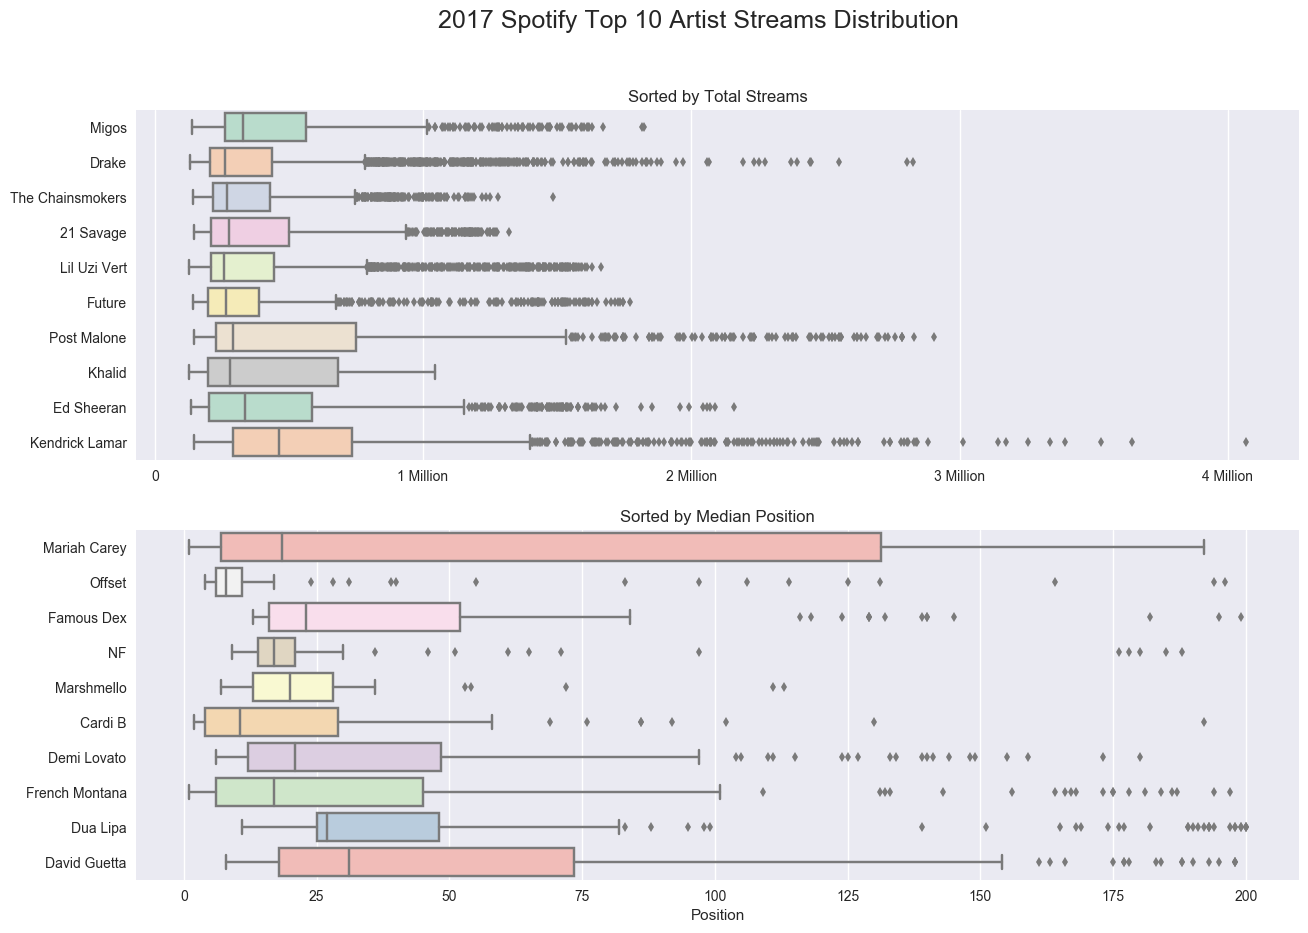

In [73]:
fig = plt.figure(figsize=(15,10))
fig = plt.suptitle('2017 Spotify Top 10 Artist Streams Distribution', fontsize=18)

ax = plt.subplot(211)
data = df[df.Artist.isin(df.groupby('Artist').agg([np.sum])['Streams'].sort_values(by='sum', ascending=False).head(10).index.tolist())]

ax = sns.boxplot(x='Streams', y='Artist', data=data, palette='Pastel2'),
plt.title('Sorted by Total Streams'),
plt.ylabel(''), 
plt.xlabel(''), 
plt.xticks(np.arange(0,5*10**6,10**6), ['0', '1 Million', '2 Million', '3 Million', '4 Million'])


plt.subplot(212)
data = df[df.Artist.isin(df.groupby('Artist').agg([np.median])['Position'].sort_values(by='median', ascending=True).head(10).index.tolist())]

ax2 = sns.boxplot(x='Position', y='Artist', data=data, palette='Pastel1'),
plt.title('Sorted by Median Position'),
plt.gca().invert_yaxis(),
ax2 = plt.ylabel('')

plt.show()

## David Guetta has both the highest median position and the 2nd largest distribution
### Mariah Carey has the largest distribution of Position among the top 10 artists.

Total Streams distribution appears fairly consistent across the top 10 artists

Which artist has the smallest and largest stream and Position variance?

In [74]:
print('Largest Variance', '*'*100)
display(df.groupby('Artist').agg([np.mean, np.median, np.std])['Streams'].sort_values(by=['std'], ascending=False).head(1))
print('\n', 'Smallest Variance', '*'*100)
display(df.groupby('Artist').agg([np.mean, np.median, np.std])['Streams'].sort_values(by=['std'], ascending=False).tail(1))

Largest Variance ****************************************************************************************************


,mean,median,std
Artist,,,
Kendrick Lamar,"619,420","461,133","524,343"



 Smallest Variance ****************************************************************************************************


,mean,median,std
Artist,,,
mansionz,"166,943","166,943",nan


Kendrick Lamar has the largest Stream variance

In [75]:
print('Largest Variance', '*'*100)
display(df.groupby('Artist').agg([np.mean, np.median, np.std])['Position'].sort_values(by=['std'], ascending=False).head(1))
print('Smallest Variance', '*'*100)
display(df.groupby('Artist').agg([np.mean, np.median, np.std])['Position'].sort_values(by=['std'], ascending=False).tail(1))

Largest Variance ****************************************************************************************************


,mean,median,std
Artist,,,
Blue Öyster Cult,132,132,93


Smallest Variance ****************************************************************************************************


,mean,median,std
Artist,,,
mansionz,196,196,nan


mansionz appears to have both the smallest positional variance and smallest stream variance

Blue Öyster Cult has the largest Position variance

# Future work.
get genre data, predict positions of genres, predict a genre dominance at a particular time

# Is Kendrick Lamar the most viral artist of 2017?

Short answer is yes
